In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
%matplotlib inline

dataset_train = pd.read_csv("AAPL21-22.csv", header = 0, sep = ",")
dataset_train.head()

training_set = dataset_train.iloc[:,1:2].values
#print(training_set)
print(training_set.shape)


(252, 1)


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

X_train = []
Y_train = []
for i in range(76, 252):
    X_train.append(scaled_training_set[i-76:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(176, 76, 1)


In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [4]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)


Epoch 1/50
6/6 [==============================] - 13s 217ms/step - loss: 0.0403
Epoch 2/50
6/6 [==============================] - 1s 212ms/step - loss: 0.0216
Epoch 3/50
6/6 [==============================] - 1s 184ms/step - loss: 0.0227
Epoch 4/50
6/6 [==============================] - 1s 192ms/step - loss: 0.0155
Epoch 5/50
6/6 [==============================] - 1s 186ms/step - loss: 0.0138
Epoch 6/50
6/6 [==============================] - 1s 181ms/step - loss: 0.0125
Epoch 7/50
6/6 [==============================] - 1s 159ms/step - loss: 0.0120
Epoch 8/50
6/6 [==============================] - 1s 188ms/step - loss: 0.0121
Epoch 9/50
6/6 [==============================] - 1s 189ms/step - loss: 0.0108
Epoch 10/50
6/6 [==============================] - 1s 170ms/step - loss: 0.0119
Epoch 11/50
6/6 [==============================] - 1s 170ms/step - loss: 0.0111
Epoch 12/50
6/6 [==============================] - 1s 192ms/step - loss: 0.0091
Epoch 13/50
6/6 [==============================]

In [5]:
dataset_test = pd.read_csv("AAPL21-22.csv", header = 0, sep = ",")
print(dataset_test[' Open'])
actual_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train[' Open'], dataset_test[' Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-76:].values

inputs = inputs.reshape(-1,1)
scaler.clip = False  # add this line
inputs = scaler.transform(inputs)

X_test = []
for i in range(76, 252):
    X_test.append(inputs[i-76:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

0      178.085
1      179.470
2      179.330
3      180.160
4      177.085
        ...   
247    132.430
248    128.360
249    127.720
250    128.890
251    133.520
Name:  Open, Length: 252, dtype: float64


In [27]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
reverse_prediction = []
reverse_actual = []
for i in predicted_stock_price[::-1]:
    reverse_prediction.append(i)
for i in range(76):
    reverse_prediction.insert(0,125)
for x in actual_stock_price[::-1]:
    reverse_actual.append(x)
for i in range(10):
    reverse_prediction.pop()
    reverse_actual.pop()
print(reverse_actual)

6/6 [==============================] - 0s 67ms/step
[array([133.52]), array([128.89]), array([127.72]), array([128.36]), array([132.43]), array([129.19]), array([128.5]), array([128.76]), array([130.8]), array([128.78]), array([127.78]), array([128.66]), array([133.8]), array([136.28]), array([143.07]), array([143.6]), array([143.43]), array([139.52]), array([135.83]), array([133.75]), array([135.73]), array([135.76]), array([136.3]), array([137.35]), array([136.03]), array([136.62]), array([136.48]), array([135.9]), array([134.35]), array([135.49]), array([131.25]), array([129.2]), array([130.24]), array([128.01]), array([123.76]), array([124.94]), array([124.68]), array([122.59]), array([123.75]), array([128.41]), array([124.81]), array([121.75]), array([120.98]), array([120.93]), array([119.03]), array([121.69]), array([122.54]), array([120.4]), array([121.41]), array([125.7]), array([124.05]), array([122.88]), array([119.9]), array([120.33]), array([123.33]), array([122.82]), array

C:\Program Files\Python38\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


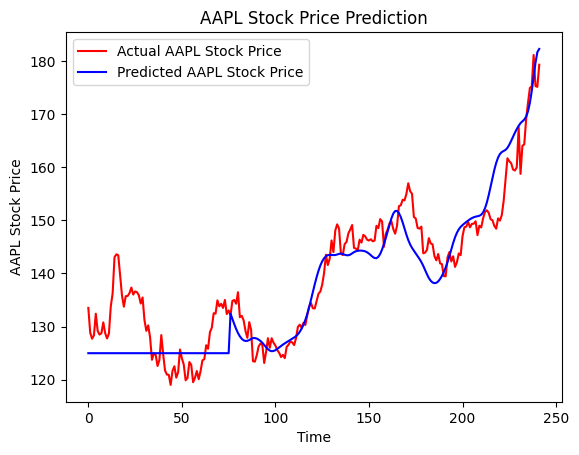

In [28]:
plt.plot(reverse_actual, color = 'red', label = 'Actual AAPL Stock Price')
plt.plot(reverse_prediction, color = 'blue', label = 'Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()